<a href="https://colab.research.google.com/github/cthitch137/PHYS250/blob/main/Collin_Hitchcock_Lab08_Fourier_Transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

The basic idea of the fourier transform is that almost all functions can be written as the sum of cosine and sine functions.

The goal of today's lab is to develop some intuition for Fourier transforms.

We will do this by:

* making a wave that is the sum of 3 cosine functions.  We will then take Fourier transform of the summed wave and interpret the results.

* analyzing the number of sunspots versus time using a Fourier transform.


* determining the frequencies and harmonics that give different instruments their unique tone.


* **The answers to all of the questions should be written in paragraph form in your wiki summary for this lab.**



In [26]:
# import numpy and matplotlib modules
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Summing cosine functions

(5 points)

The general form on a cosine function is:

$$ f(t) = A cos(\omega t + \phi) $$

Let's make a graph of 3 different cosine functions over the range $0 < t < 4$

* Create a time array that goes from $0 < t < 4$ with 100 steps
* Set the angular frequencies: $\omega = [\pi,2\pi,4\pi]$
* Set the amplitudes: $A = [0.5, 1, 0.75]$
* Set the phase shifts: $\phi = [\pi/2,\pi,3\pi/2]$
* Then graph the individual curves and the sum of the three cosine functions.

In [27]:
#################
## NO FUNCTION ##
#################

# use linspace to set up time array called t
t = np.linspace(0,4,100)

omega = [np.pi, 2*np.pi, 4*np.pi]

A = [0.50, 1.00, 0.75]

phi = [np.pi/2, np.pi, 3*np.pi/2]
# set up the three cosine curves
func1 = A[0] * np.cos(omega[0]*t + phi[0])
func2 = A[1] * np.cos(omega[1]*t + phi[1])
func3 = A[2] * np.cos(omega[2]*t + phi[2])


In [28]:
#####################################
## SAME AS ABOVE BUT WITH FUNCTION ##
#####################################


def function1(A, omega, t, phi):
  plt.figure(figsize=(12,16))
  sum_func = np.zeros(len(t))
  i=0
  for i in range(len(A)):
    func = A[i] * np.cos(omega[i]*t + phi[i])
    plt.subplot(4,1,i+1)
    if i == 0:
      plt.title('Summing Cosine Functions')
    plt.plot(t, func, label=f'Function {i+1}')
    sum_func+=func
    i=i+2
    plt.legend()
    plt.ylabel('Y-Values (radians)')
    plt.xlabel('Time (s)')
  plt.subplot(4,1,i)
  plt.plot(t, sum_func, label=f'Sum of Functions')
  plt.xlabel('Time (s)')
  plt.ylabel('Function Value (radians)')
  plt.legend()
  return sum_func

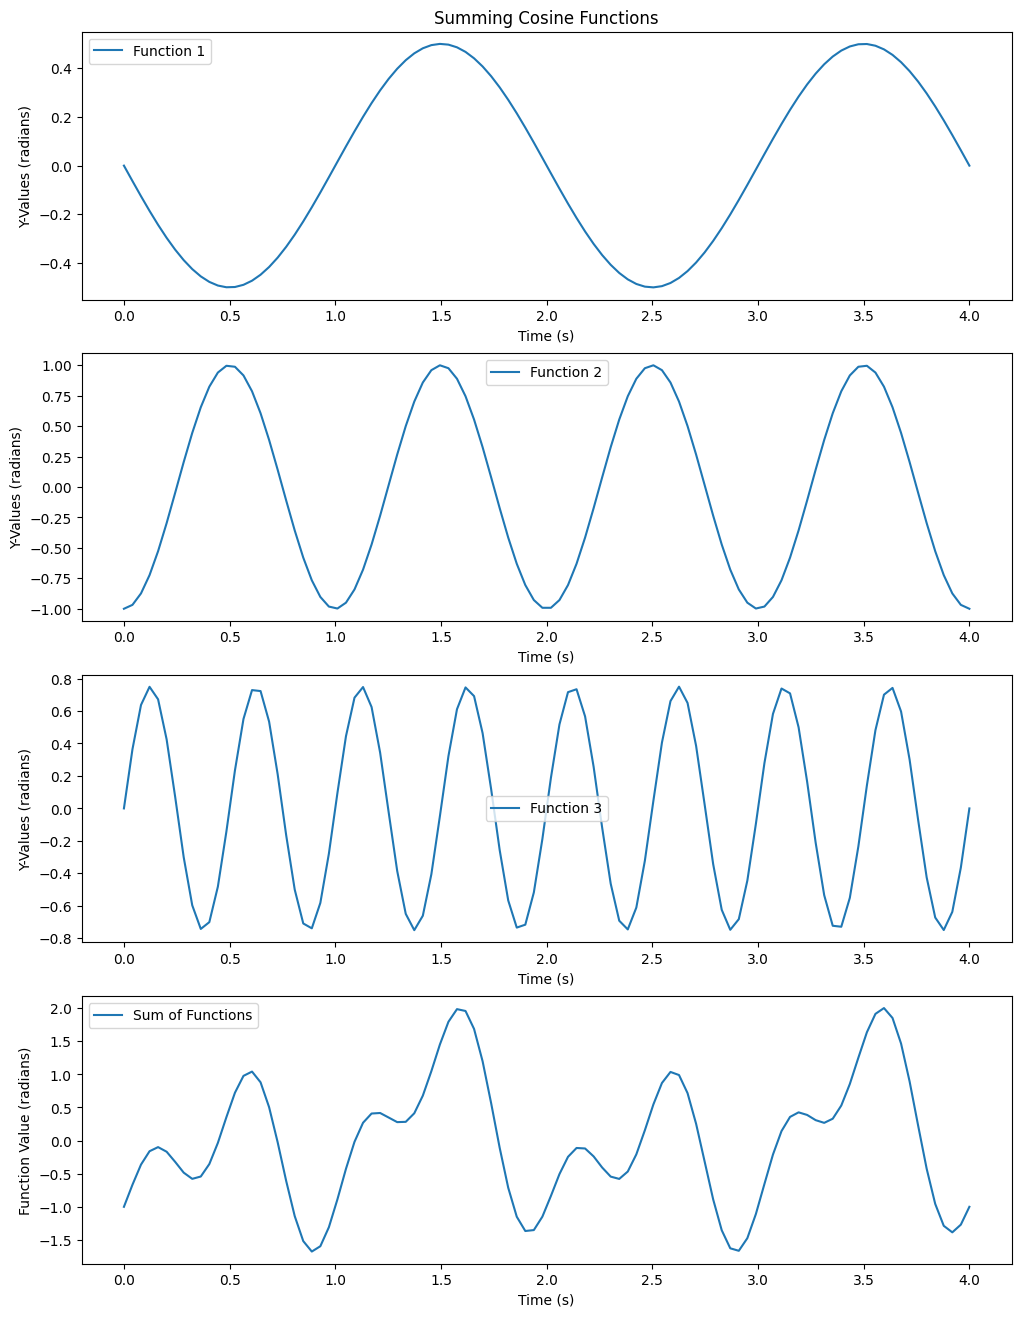

In [29]:
sum_func = function1(A, omega, t, phi)


# Part 2: Compute the Fourier Transform of Your Summed Wave

(5 points)

Use numpy's fft function to compute the Fourier transform of your summed wave.

In [30]:
from numpy.fft import fft

In [31]:
#help(fft)

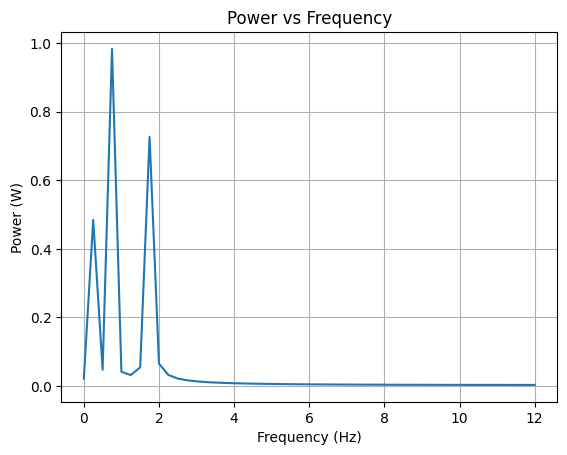

In [32]:
# get the FFT of the summed wave
# save the output into the variable Y
Y = fft(sum_func)

#######################################################
## the following code will help convert the output from
## fft into a result we can interpret
#######################################################

n=len(t)

power = np.abs(Y[1:int(n/2)])/(n/2+1)# the power

# the following code converts the time array to a frequency array
TMAX = (t[1]-t[0])*(n-1)
df = 1/TMAX # this is the lowest frequency we can sample
frequency=np.arange(int(n/2))*df


# create a figure showing power versus frequency
plt.figure()
plt.title('Power vs Frequency')
plt.plot(frequency[0:-1], power)
# label the axes
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (W)')
# add a grid using plt.grid()
plt.grid()

### Interpret Your Results

(5 points)

* Which frequencies have a significant amplitude (coefficient > 0.10)?
* How do these frequecies relate to the frequencies of the three waves that you used to create ```sumwave```?

* How does the amplitude of the Fourier coefficients relate to the amplitude of the three cosine waves that were summed to create ```sumwave```?

**There are three frequencies that are greater than 0.10. They range between 0 and 2 which peak around 0.25 Hz, 0.6 Hz, and 1.8 Hz, approximately. The waves that make up the sum waves seem like they correlate with the spikes seen on the graph.**

# Part 3: Analyzing the Periodicity in Sunspots

(5 points)

*Adapted from Newman, Computational Physics, Exercise 7.2*

The data file ```sunspots.txt``` has the observed number of sunspots for each month since January 1749!  

The file contains two columns of numbers: the month and the number of sunspots.

* Retrieve the file using wget
```!wget http://www-personal.umich.edu/~mejn/cp/data/sunspots.txt```
* Read in the file
* Make a plot of the number of sunspots versus month.
* Estimate the period of the sunspot cycle from your graph.

**I estimate the period to be 720 months, or 60 years.**

In [33]:
# wget command here
!wget http://www-personal.umich.edu/~mejn/cp/data/sunspots.txt

--2024-03-18 21:01:29--  http://www-personal.umich.edu/~mejn/cp/data/sunspots.txt
Resolving www-personal.umich.edu (www-personal.umich.edu)... 141.211.243.103
Connecting to www-personal.umich.edu (www-personal.umich.edu)|141.211.243.103|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.websites.umich.edu/~mejn/cp/data/sunspots.txt [following]
--2024-03-18 21:01:29--  https://public.websites.umich.edu/~mejn/cp/data/sunspots.txt
Resolving public.websites.umich.edu (public.websites.umich.edu)... 141.211.243.103
Connecting to public.websites.umich.edu (public.websites.umich.edu)|141.211.243.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30244 (30K) [text/plain]
Saving to: ‘sunspots.txt.6’

sunspots.txt.6      100%[===================>]  29.54K  --.-KB/s    in 0.001s  

2024-03-18 21:01:29 (44.0 MB/s) - ‘sunspots.txt.6’ saved [30244/30244]



In [34]:
# code to read in file
# save the month as month and the number of sunspots as nspots
data = np.loadtxt('sunspots.txt')
x = data[:,0]
y = data[:,1]

Text(0, 0.5, 'Number of Sunpots')

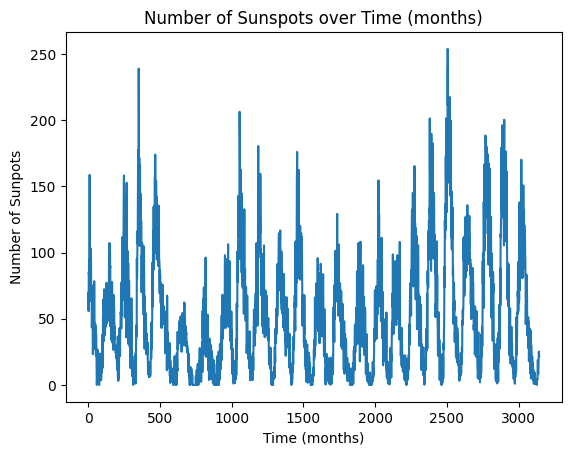

In [35]:
# make your graph here
plt.plot(x,y)
plt.title('Number of Sunspots over Time (months)')
plt.xlabel('Time (months)')
plt.ylabel('Number of Sunpots')

### Analyze the number of sunspots using a Fourier Transform

(5 points)

Use the `fft` function to analyze the periodicity of the number of sunspots.

Copy the code from Part 2 to help convert the output of `fft` to a form that we can interpret.



In [36]:
# run fft on nspots
Y = fft(y)


<ipython-input-44-d61968dbc721>:13: RuntimeWarning: divide by zero encountered in divide
  period = 1 / frequency[0:-1]


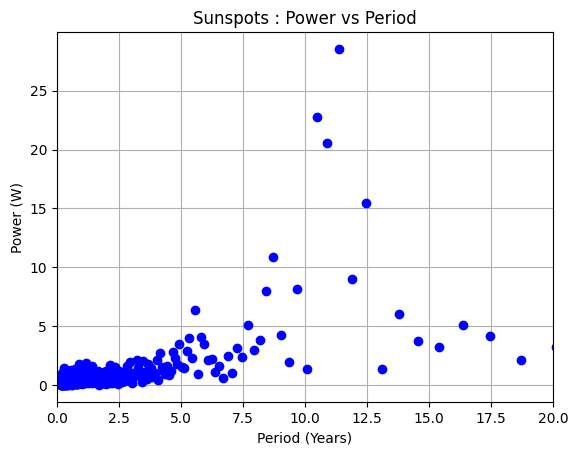

In [44]:
# copy code from part 2 to convert the output of fft
n=len(x)

power = np.abs(Y[1:int(n/2)])/(n/2+1)# the power

# the following code converts the time array to a frequency array
TMAX = (x[1]-x[0])*(n-1)
df = 1/TMAX # this is the lowest frequency we can sample
frequency=np.arange(int(n/2))*df


# convert the frequency to period: period = 1/frequency
period = 1 / frequency[0:-1]

# plot the power versus period, rather than versus frequency
plt.figure()
plt.title('Sunspots : Power vs Period')
plt.plot(period/12, power, 'bo')
plt.xlim(0,20)
# label the axes
plt.xlabel('Period (Years)')
plt.ylabel('Power (W)')
# add a grid using plt.grid()
plt.grid()

The Fourier coefficients should indicate that there is one period that has a higher amplitude than the others.  
* Compare this period to the period you estimated from the graph of the number of sunspots versus time.  
* Compare your period with the known value.


**YOUR ANSWER HERE**


# Part 4: Build a square wave from cosine functions

(5 points)

Almost every wave can be represented as a series of sine/cosine functions.  In this part, you need to create a square wave by summing sine waves of various frequencies and amplitudes.  To create a square wave, the frequency and amplitudes of successive waves must decrease in a specific pattern.

The basics of what you should do are listed in the cell below.  You will need to play around with amplitudes and frequencies to get a result that look like a square wave.

Good luck!  And check your results with an instructor.

Hint: https://www.mathworks.com/help/matlab/math/square-wave-from-sine-waves.html

Text(0, 0.5, 'Radians')

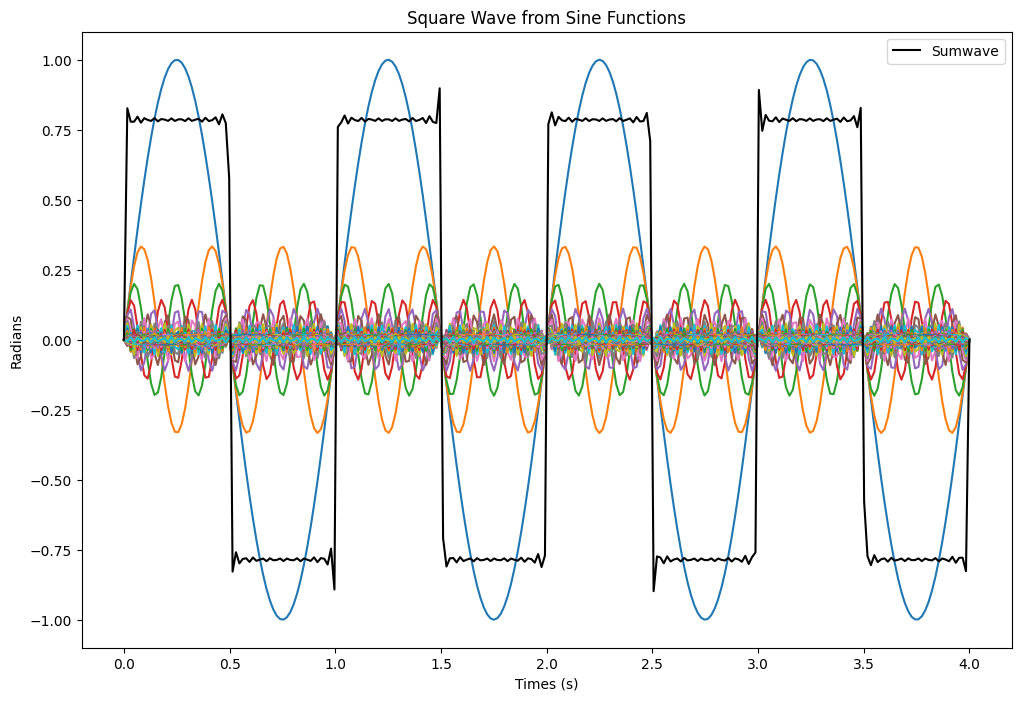

In [38]:
T = 1# Period is 1 sec
a0 = 1 # no DC offset
w0 = 2*np.pi/T

t = np.linspace(0,4,250)
plt.figure(figsize=(12,8))
# try adding 50 sine functions together
sum_sinwave = np.zeros(len(t))
for i in range(1,100,2):
  # compute a new sine function
  y = a0/i * np.sin(i*t*w0)
  # plot the sine versus time
  plt.plot(t, y)
  # add the new function to the sum
  sum_sinwave += y
# plot the sumwave vs time
plt.plot(t, sum_sinwave, 'k-', label='Sumwave')
plt.legend()
plt.title('Square Wave from Sine Functions')
plt.xlabel('Times (s)')
plt.ylabel('Radians')

# Part 5: Analyzing Sound of Musical Instruments

(5 points)

*from Newman, Computational Physics, Exercise 7.3*

* Use wget to download two sound files that represent the same note played on the piano and trumpet.
  * http://www-personal.umich.edu/~mejn/cp/data/piano.txt
  * http://www-personal.umich.edu/~mejn/cp/data/trumpet.txt

* Plot both of the waveforms on the same figure with one column and two rows.




In [39]:
# wget files
!wget http://www-personal.umich.edu/~mejn/cp/data/piano.txt
!wget http://www-personal.umich.edu/~mejn/cp/data/trumpet.txt

# load files
piano = np.loadtxt('piano.txt')
trumpet = np.loadtxt('trumpet.txt')

--2024-03-18 21:01:31--  http://www-personal.umich.edu/~mejn/cp/data/piano.txt
Resolving www-personal.umich.edu (www-personal.umich.edu)... 141.211.243.103
Connecting to www-personal.umich.edu (www-personal.umich.edu)|141.211.243.103|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.websites.umich.edu/~mejn/cp/data/piano.txt [following]
--2024-03-18 21:01:31--  https://public.websites.umich.edu/~mejn/cp/data/piano.txt
Resolving public.websites.umich.edu (public.websites.umich.edu)... 141.211.243.103
Connecting to public.websites.umich.edu (public.websites.umich.edu)|141.211.243.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482300 (471K) [text/plain]
Saving to: ‘piano.txt.8’

piano.txt.8         100%[===================>] 471.00K  1.21MB/s    in 0.4s    

2024-03-18 21:01:31 (1.21 MB/s) - ‘piano.txt.8’ saved [482300/482300]

--2024-03-18 21:01:31--  http://www-personal.umich.edu/~mejn/cp/data/trumpet.txt
Resolvin

Text(0, 0.5, 'Frequency')

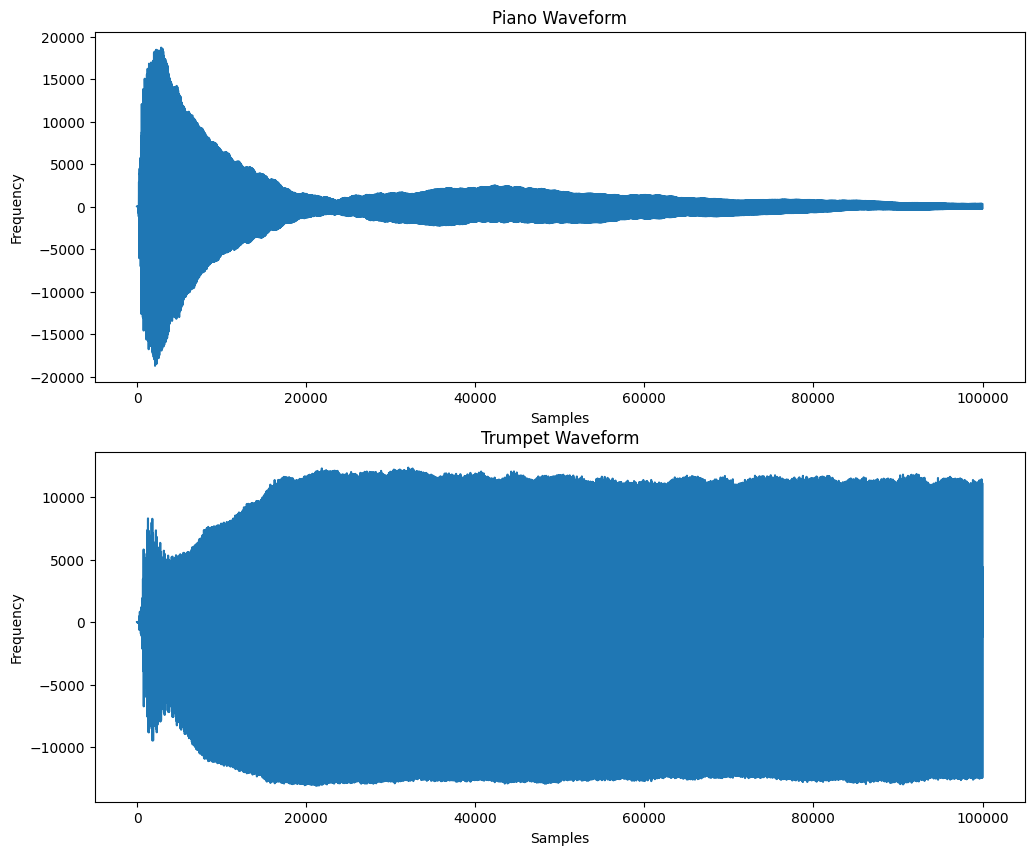

In [25]:
# plot the waveforms
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.title('Piano Waveform')
plt.plot(piano)
plt.xlabel('Samples')
plt.ylabel('Frequency')

plt.subplot(2,1,2)
plt.title('Trumpet Waveform')
plt.plot(trumpet)
plt.xlabel('Samples')
plt.ylabel('Frequency')

### Analyze the frequency spectrum

Feed both the piano and trumpet files through the `fft` function.

Both waveforms were recorded at the industry standard rate of 44,100 samples per second.  This means we can calculate `Tmax` as:

```
Tmax = len(piano)/44100 # Tmax in seconds
```

You can then follow the examples above to calculate the frequency array.



In [40]:
# compute the Fourier transform
Y_piano = fft(piano)
pn=len(piano)
ppower = abs(Y_piano)
pTMAX = (pn)/44100 # max time in sec
pdf = 1/pTMAX
pfreq=np.arange(int(pn/2))*pdf

Y_trumpet = fft(trumpet)
tn=len(trumpet)
tpower = abs(Y_trumpet)
tTMAX = (tn)/44100 # max time in sec
tdf = 1/tTMAX
tfreq=np.arange(int(tn/2))*tdf

Text(0, 0.5, 'Power (W)')

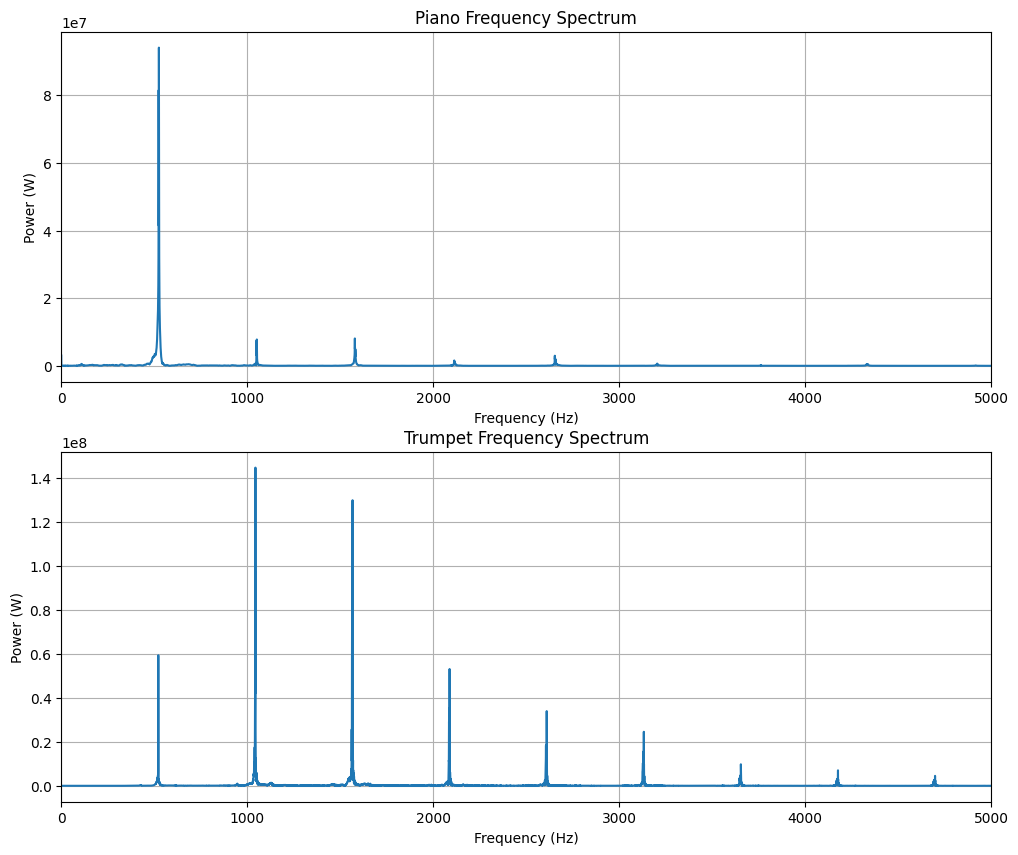

In [42]:
# convert the output from fft to a frequency spectrum
# plot power vs
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.plot(pfreq,np.abs(Y_piano[0:pn//2]),label='Piano')
plt.grid()
plt.xlim(0,5000)
plt.title('Piano Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (W)')

plt.subplot(2,1,2)
plt.plot(tfreq,np.abs(Y_trumpet[0:tn//2]),label='Trumpet')
plt.grid()
plt.xlim(0,5000)
plt.title('Trumpet Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (W)')

**QUESTIONS**

(5 points)

* Discuss what one can conclude about the sound of the trumpet and piano based on their frequency spectra.

* Both instruments are playing the same musical note.  From your Fourier transform results, calculate what note they were playing.  (Hint: the musical note middle C has a frequency of 261 Hz.

* Is the note in the audible range?  You can test your answer here: https://www.szynalski.com/tone-generator/

### Some other cool things to explore

https://www.kaggle.com/code/davidbroberts/piano-triads